In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as ps

# Legg til src-mappen i sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_rens import DataRens
from statistiske_maal import Statistiske_maal
from data_manipulering import DataManipulering


# Nedbør:

* Oppretter et objekt av klassen DataRens og DataManipulering
* Bruker metodene for å opprette en dataframe og "forfalsker" datafeil

In [2]:
# Oppretter filstien til JSONfil med nedbør
nedbor_fil = "../data/frost_nedbor.json"

# Oppretter et nedbørs-objekt i DataRens()
rens_nedbor = DataRens()
manip_nedbor = DataManipulering()


# Lager DataFrame av en JSON
df = rens_nedbor.fra_json_til_dataframe(nedbor_fil)


### Manipulerer dataen:
df_fjern_verdi = manip_nedbor.fjern_verdi_for_tilfeldig_aar(df)
df_legg_til_duplikater = manip_nedbor.legg_til_duplikater_for_tilfeldig_aar(df_fjern_verdi)


#Viser den manipulerte dataframen:
display(df_legg_til_duplikater.head())


Fjern verdi for år 2016 (rad: 36)
Legger til duplikat for år 1986.
Totalt antall rader etter duplisering: 42.


,sourceId,referenceTime,elementId,value,unit,timeOffset,performanceCategory,year
0,SN18700:0,1980-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),766.8,mm,PT6H,C,1980
1,SN18700:0,1981-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),712.2,mm,PT6H,C,1981
2,SN18700:0,1982-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),840.5,mm,PT6H,C,1982
3,SN18700:0,1983-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),646.1,mm,PT6H,C,1983
4,SN18700:0,1984-01-01 00:00:00+00:00,sum(precipitation_amount P1Y),871.4,mm,PT6H,C,1984


- Bruker metoder fra DataRens for å rense dataframen

In [3]:
# Bruke metode for å rense Dataframen
df_nedbor_renset = rens_nedbor.rens_DataFrame(df_legg_til_duplikater)

# Legge til nye gjennomsnittlige verdier
df_med_gjennomsnittlige_verdier = rens_nedbor.nye_nedbør_verdier(df_nedbor_renset)

# Printer ut renset dataframe av nedbør
display("Ferdig renset dataframe: ", df_med_gjennomsnittlige_verdier)


Antall duplikater funnet: 1
Duplikater er fjernet - antall rader:  41
Antall år med manglende verdi: 1
Rader uten verdi:
 year  value unit
 2016    NaN   mm
Manglende verdier er erstattet med gjennomsnittet:  832.18


'Ferdig renset dataframe: '

,year,value,avg_per_day,unit,days
0,1980,766.80,2.10,mm,366
1,1981,712.20,1.95,mm,365
2,1982,840.50,2.30,mm,365
3,1983,646.10,1.77,mm,365
4,1984,871.40,2.38,mm,366
5,1985,910.40,2.49,mm,365
40,1986,709.60,1.94,mm,365
6,1987,852.50,2.34,mm,365
7,1988,1082.80,2.96,mm,366
8,1989,777.80,2.13,mm,365


# Beregninger av statistiske mål:
Beregningene gjøres i 4 intervaller: <br>
1980-1989 <br>
1990-1999 <br>
2000-2009 <br>
2010-2020 <br>

Samt en beregning for hele intervallet i sin helhet (1980-2020)

**Beregning av gjennomsnitt**


In [4]:
nedbor_mål = Statistiske_maal()

gjennomsnitt_nedbor = nedbor_mål.gjennomsnitt(df_nedbor_renset)

print("Gjennomsnitt i 4 intervaller + totalt: ")
for key, value in gjennomsnitt_nedbor.items():
    print(f"{key}: {value} mm")



Gjennomsnitt i 4 intervaller + totalt: 
1980-1989: 817.01 mm
1990-1999: 723.45 mm
2000-2009: 876.73 mm
2010-2020: 904.31 mm
Totalt: 832.18 mm


**Beregning av median**

In [5]:
median_nedbor = nedbor_mål.median(df_nedbor_renset)

print("Median i 4 intervaller + totalt: ")
for key, value in median_nedbor.items():
    print(f"{key}: {value} mm")

Median i 4 intervaller + totalt: 
1980-1989: 809.15 mm
1990-1999: 722.7 mm
2000-2009: 853.05 mm
2010-2020: 942.2 mm
Totalt: 817.8 mm


**Beregning av standardavvik**

In [6]:
standardavvik_nedbor = nedbor_mål.standardavvik(df_nedbor_renset)

print("Standardavvik i 4 intervaller + totalt: ")
for key, value in standardavvik_nedbor.items():
    print(f"{key}: {value} mm")

Standardavvik i 4 intervaller + totalt: 
1980-1989: 124.69 mm
1990-1999: 102.96 mm
2000-2009: 142.68 mm
2010-2020: 139.37 mm
Totalt: 142.34 mm


# Visualiseringer:

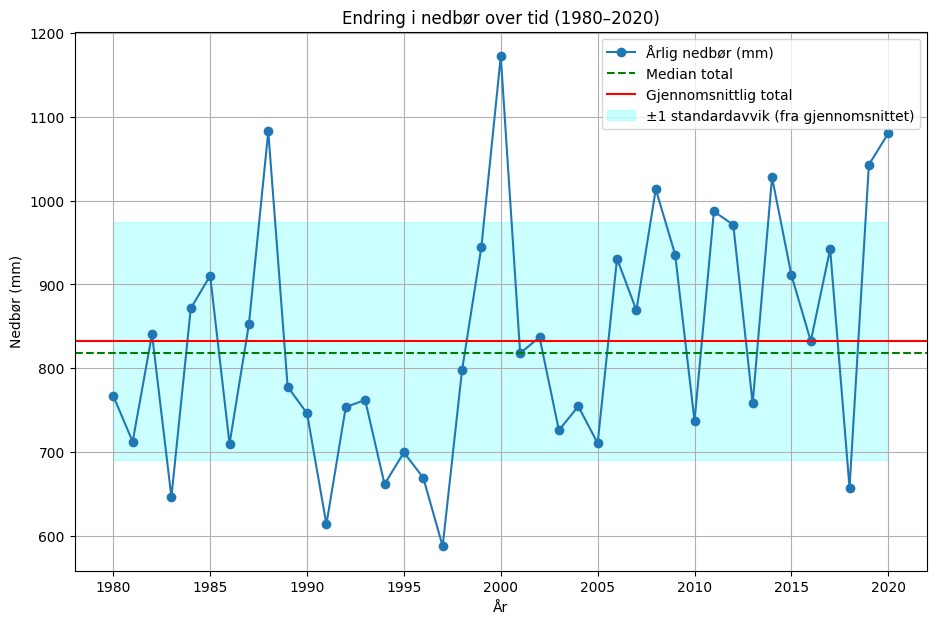

In [17]:
år = df_med_gjennomsnittlige_verdier["year"]
verdier = df_med_gjennomsnittlige_verdier["value"]
median = median_nedbor["Totalt"]
gjennomsnitt = gjennomsnitt_nedbor["Totalt"]
standardavvik = standardavvik_nedbor["Totalt"]

#Lager et figurvindu for visning 
plt.figure(figsize=(11, 7))

#Tegner selve diagrammet 
plt.plot(år, verdier, marker='o', label='Årlig nedbør (mm)')
plt.title('Endring i nedbør over tid (1980–2020)')
plt.xlabel('År')
plt.ylabel('Nedbør (mm)')

#Legger inn de statistiske målene
plt.axhline(y= median, color="green", linestyle='--', label="Median total")
plt.axhline(y=gjennomsnitt, color="red", label="Gjennomsnittlig total")
plt.fill_between(år, gjennomsnitt - standardavvik, gjennomsnitt + standardavvik,
                 color='cyan', alpha=0.2, label='±1 standardavvik (fra gjennomsnittet)')

#Justerer visningen av figuren 
plt.grid(True)
plt.legend()
plt.show()